# Data Mining - Assignment 4 pt. 1
##### Group 6: Mathew Spencer, Alex Foster, Danae Vassiliadis, Natalie Kim

In [1]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

### Question 1
1. Use diabetes dataset from canvas. Readmitted is dependent variable
2. Merge the < 30 days and > 30 days values to "Yes". For logistic regression dependent variable should be binary.
3. Dummy/oneHot encode categorical variables. (One hot encode on whole dataset and then use for splitting)
4. Separate dataset into train and test samples (70:30). Using random_state while splitting. Save these samples.

In [2]:
# Read diabetes dataset
data = pd.read_csv(r'/Users/xnxk040/Library/CloudStorage/OneDrive-W.WGrainger,inc/Desktop/data mining data/Diabetese Dataset Files/diabetes_data.csv')

In [3]:
# data.head()

In [4]:
# Replace '?' to np.nan to understand missing values
data.replace('?', np.nan, inplace = True)

In [5]:
def convert_diag_codes(code):
    if (pd.isnull(code)):
        return 'Other'
    elif ('V' in code) or ('E' in code):
        return 'Other'
    else:
        code = float(code)
        if (code >= 390) and (code < 460) or (np.floor(code) == 785):
            return 'Circulatory'
        elif (code >= 460) and (code <520) or (np.floor(code) == 786):
            return 'Respiratory'
        elif (code >= 520) and (code < 580) or (np.floor(code)==787):
            return 'Digestive'
        elif (code == 250):
            return 'Diabetes'
        elif (code >= 800) and (code < 1000):
            return 'Injury'
        elif (code >= 710) and (code < 740):
            return 'Musculoskeletal'
        elif (code >= 580) and (code < 630) or (np.floor(code) == 788):
            return 'Genitourinary'
        elif (code >= 140) and (code < 240):
            return 'Neoplasms'
        else:
            return 'Other'

In [6]:
data['diag_1'] = data['diag_1'].apply(lambda x:convert_diag_codes(x))

In [7]:
# Convert age to numeric
age_dict = {"[0-10)":5, "[10-20)": 15, "[20-30)":25, "[30-40)":35, "[40-50)": 45, "[50-60)":55, "[60-70)":65, "[70-80)":75, "[80-90)":85, "[90-100)":95}
data['age'] = data['age'].map(age_dict)
data['age'] = data['age'].astype('int64')

In [8]:
# Convert 2 value categories into binary variable

# change
data['change'] = data['change'].replace('Ch', 1)
data['change'] = data['change'].replace('No', 0)

# gender
data['gender'] = data['gender'].replace('Male', 1)
data['gender'] = data['gender'].replace('Female', 0)

# diabetesMed
data['diabetesMed'] = data['diabetesMed'].replace('Yes', 1)
data['diabetesMed'] = data['diabetesMed'].replace('No', 0)

In [9]:
# Merge categories to one/two level less
data['A1Cresult'] = data['A1Cresult'].replace('>7', 'Abnormal')
data['A1Cresult'] = data['A1Cresult'].replace('>8', 'Abnormal')
data['A1Cresult'] = data['A1Cresult'].replace('Norm', 'Normal')
data['A1Cresult'] = data['A1Cresult'].replace('None', 'Not tested')

data['max_glu_serum'] = data['max_glu_serum'].replace('>200', 'Abnormal')
data['max_glu_serum'] = data['max_glu_serum'].replace('>300', 'Abnomal')
data['max_glu_serum'] = data['max_glu_serum'].replace('Norm', 'Normal')
data['max_glu_serum'] = data['max_glu_serum'].replace('None', 'Not tested')

In [10]:
# Merge variables
data['admission_type_id'] = data['admission_type_id'].replace(2,1)
data['admission_type_id'] = data['admission_type_id'].replace(7,1)
data['admission_type_id'] = data['admission_type_id'].replace(6,5)
data['admission_type_id'] = data['admission_type_id'].replace(8,5)

In [11]:
# Convert numerical columns to string - though they look numerical
data['admission_type_id'] = data['admission_type_id'].map(str)
data['discharge_disposition_id'] = data['discharge_disposition_id'].map(str)

In [12]:
# Removing dupicates
data = data.drop_duplicates(subset = ['patient_nbr'], keep = 'first')

In [13]:
# Drop columns where values are missing >= 40% or have same values
data.drop(['patient_nbr', 'diag_2', 'diag_3', 'encounter_id', 'admission_source_id'], axis = 1, inplace = True)

# Other columns to possibly drop:
# 'weight', 'payer_code', 'medical_specialty', 'citoglipton', 'examide'

In [14]:
# Check for Missing values
def cal_missing_val(df):
    data_dict = {}
    for col in df.columns:
        data_dict[col] = (df[col].isnull().sum()/df.shape[0])*100
    return pd.DataFrame.from_dict(data_dict, orient = 'index', columns = ['MissingValueInPercentage'])

cal_missing_val(data)

,MissingValueInPercentage
race,0.0
gender,0.0
age,0.0
admission_type_id,0.0
discharge_disposition_id,0.0
time_in_hospital,0.0
num_lab_procedures,0.0
num_procedures,0.0
num_medications,0.0
number_outpatient,0.0


In [15]:
# Select categorical columns to get_dummies (27 columns from the sample code)
categorical_cols = ['race','admission_type_id','discharge_disposition_id','diag_1','max_glu_serum',
                    'A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide',
                    'glimepiride','acetohexamide','glipizide','glyburide','tolbutamide',
                    'pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide',
                    'insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone',
                    'metformin-pioglitazone']

In [16]:
# Conver to Dummies
data_dummies = pd.get_dummies(data[categorical_cols], drop_first = True)

In [17]:
data_dummies.head(5)

,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_id_3,admission_type_id_4,admission_type_id_5,discharge_disposition_id_10,discharge_disposition_id_11,discharge_disposition_id_12,...,troglitazone_Steady,tolazamide_Steady,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,metformin-pioglitazone_Steady
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [18]:
# Merge the '< 30' and '> 30' days to 'YES'
readmit_dict = {'>30':1, '<30':1, 'NO':0}
data['readmitted'] = data['readmitted'].map(readmit_dict)

In [19]:
# Merge dummies with numerical cols
noncategorical_cols = [col for col in data.columns if col not in categorical_cols]

In [20]:
data_preprocess = pd.concat([data[noncategorical_cols], data_dummies], axis = 1)
data_preprocess.shape

(68630, 102)

In [21]:
#for column in data_preprocess.columns:
 #   if data_preprocess[column].isin(['Unknown/Invalid']).any():
  #      print(f"'Unknown/Invalid' found in column: {column}")

In [22]:
data_preprocess['gender'].value_counts()
    # only 1 instance of 'Unknown/Invalid' -- will drop row
data_preprocess = data_preprocess[data_preprocess['gender'] != 'Unknown/Invalid']

In [23]:
# Train and test samples (70:30). Using random_state while splitting
X = data_preprocess.loc[:, data_preprocess.columns != 'readmitted']
y = data_preprocess['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Question 2 & 3
5. Build logistic regression model on Train Data set:
    1. Use sklearn.linear_model.LogisticRegression OR discrete.discrete_model
    2. Use cross validation, parameter tuning (penalty, c) in sklearn package - refer to code in discussion forum
    3. Select best variables by looking at coefficients of variables and fit model with best variables and best parameters

In [24]:
# grid search cross validation to find best regularization hyper-parameters
param_map = {'penalty': ['l1', 'l2'],
             'C': [0.01, 0.1, 1, 10]}

In [25]:
# Specify class_weight = 'balanced' to acount for imbalance in re-admitted and non re-admitted patients
clf = LogisticRegression(class_weight = 'balanced', random_state = 42, solver = 'liblinear')
clf_gs = GridSearchCV(clf, param_grid = param_map, cv = 10, n_jobs = -1, verbose = 2)
    # n_jobs = -1 enables parallel processing to reduce run time
    
clf_gs.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
             verbose=2)

In [26]:
# identify best hyper-parameters
clf_gs.best_params_
# {'C': 0.01, 'penalty': 'l2'}

{'C': 0.01, 'penalty': 'l2'}

In [27]:
# use the best estimator from the cross validation to identify the most important features based on their coefficients
clf2 = LogisticRegression(C = 0.01, penalty = 'l2', class_weight = 'balanced', random_state = 42, max_iter = 4000)

clf2.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=4000,
                   random_state=42)

In [28]:
# Coefficients of Variables
coef = clf2.coef_
coef_w_names = list(zip(X_train.columns, coef[0]))
coef_w_names = sorted(coef_w_names, key = lambda x: abs(x[1]), reverse = True)
top_coef = coef_w_names[:20]

for feature, coef in top_coef:
    print(f"{feature}: {coef}")

discharge_disposition_id_11: -1.3838389650607117
discharge_disposition_id_14: -0.42966295923294784
number_inpatient: 0.42823055239780433
discharge_disposition_id_13: -0.4158052789636204
diabetesMed: 0.29499910170478855
discharge_disposition_id_22: 0.285174525509615
diag_1_Neoplasms: -0.2850848873543078
admission_type_id_5: 0.25912332805648325
number_emergency: 0.23447687291275163
discharge_disposition_id_5: 0.1921916217400135
discharge_disposition_id_6: 0.18138808693738198
race_Other: -0.17906399632205508
diag_1_Diabetes: -0.16909926535986172
diag_1_Injury: -0.16821201658510399
race_Asian: -0.1599163334637683
diag_1_Genitourinary: -0.15106617651156717
insulin_Steady: -0.15100025174705525
max_glu_serum_Normal: -0.14062025400100328
race_Hispanic: -0.13696529212846975
admission_type_id_3: -0.13312411608548091


In [29]:
# choose the top 20 features with highest coefficients
feat_v2 = [tup[0] for tup in top_coef]

In [30]:
# new training dataset with feat_v2
X_train2 = X_train.loc[:, X_train.columns.isin(feat_v2)]
X_train2.shape

(48040, 20)

In [31]:
# train model with best features
clf2.fit(X_train2, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=4000,
                   random_state=42)

### Question 4
6. Generate confusion matrix on train dataset. What function can we use for this? Table (predictions, actual readmitted columns), metrics.confusion_matrix
    1. Consider what your classification bound should be. Standard is 0.5. Is there an argument for choosing something different? Try some heuristic to change threshold for probabilities - does it improve your overall accuracy?
7. After you've decided your classficiation bound, predict test results and assign 'No' or 'Yes' to each observation based on your classification bound. Type = 'class'. Generate confusion matrix on test set.
8. Compare proportion of 0s (No) and 1s (Yes) predicted correctly in train and test. Is there stability?
9. Generate gains chart for TEST sample (OPTIONAL)

Text(0.5, 427.9555555555555, 'Predicted label')

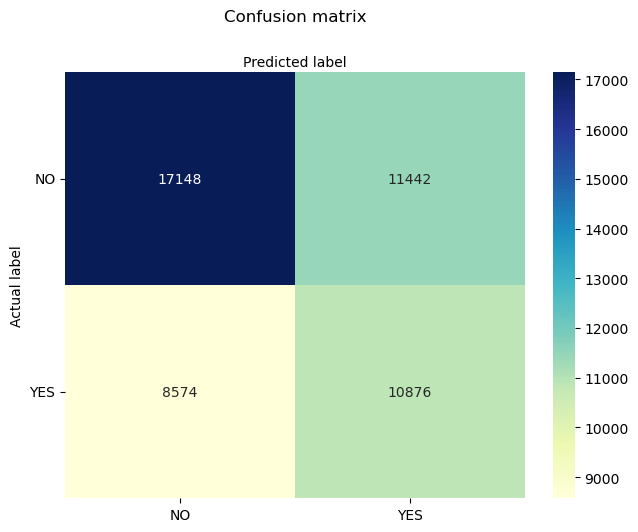

In [32]:
# confusion matrix on train dataset
y_train_pred = clf2.predict(X_train2)

train_cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred)

class_names = ['NO','YES']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

sns.heatmap(pd.DataFrame(train_cnf_matrix), annot=True, cmap="YlGnBu" , fmt = 'g', ax = ax)

ax.set_xticks(tick_marks + 0.5)
ax.set_yticks(tick_marks + 0.5)
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names, rotation = 0)

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
# Classification bound - standard is 0.5. Use ROC to see if it can be lower
cbound_map = [0.4, 0.5, 0.6, 0.7]

for cbound in cbound_map:
    print ('prediction with threshold:' + str(cbound))
    ypred = (clf2.predict_proba(X_train2)[:, 1] >= cbound).astype(int)
    #print(ypred)
    print("Accuracy:", metrics.accuracy_score(y_train, ypred))
    print("Precison:", metrics.precision_score(y_train, ypred))
    print("Recall:", metrics.recall_score(y_train, ypred))
    print("F1 score:", metrics.f1_score(y_train, ypred))
    print("\n")

prediction with threshold:0.4
Accuracy: 0.4521856786011657
Precison: 0.4222609640681957
Recall: 0.9588688946015425
F1 score: 0.5863212663281827


prediction with threshold:0.5
Accuracy: 0.5833472106577852
Precison: 0.4873196522985931
Recall: 0.5591773778920308
F1 score: 0.5207814594905191


prediction with threshold:0.6
Accuracy: 0.6197751873438802
Precison: 0.6247366203118415
Recall: 0.15244215938303343
F1 score: 0.2450818317077203


prediction with threshold:0.7
Accuracy: 0.609075770191507
Precison: 0.7131043256997456
Recall: 0.05763496143958869
F1 score: 0.10665017600608885




Area under the ROC curve for threshold 0.5: 0.6177897299917007
Area under the ROC curve for threshold 0.6: 0.5450738254068018
Area under the ROC curve for threshold 0.7: 0.5209301075123792


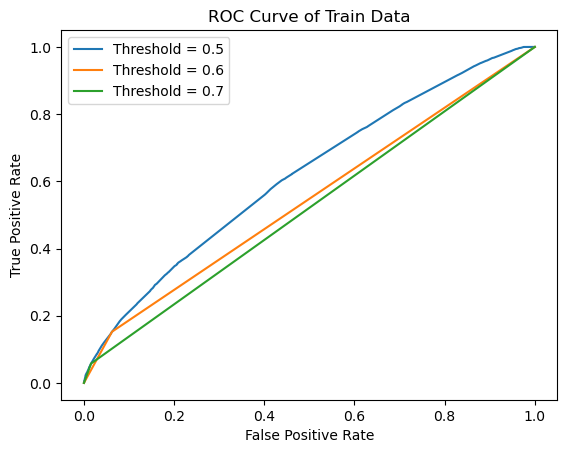

In [34]:
# ROC Curve to visualize thresholds 0.5, 0.6, 0.7
y_scores = clf2.predict_proba(X_train2)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_scores)
plt.plot(fpr, tpr, label = 'Threshold = 0.5')
print('Area under the ROC curve for threshold 0.5:', metrics.roc_auc_score(y_train, y_scores))

# for 0.6
y_pred_thresh2 = (clf2.predict_proba(X_train2)[:, 1] >= 0.6).astype(int)
fpr_, tpr_, thresholds_ = metrics.roc_curve(y_train, y_pred_thresh2)
print('Area under the ROC curve for threshold 0.6:', metrics.roc_auc_score(y_train, y_pred_thresh2))
plt.plot(fpr_, tpr_, label = 'Threshold = 0.6')

# for 0.7
y_pred_thresh3 = (clf2.predict_proba(X_train2)[:, 1] >= 0.7).astype(int)
fpr_, tpr_, thresholds_ = metrics.roc_curve(y_train, y_pred_thresh3)
print('Area under the ROC curve for threshold 0.7:', metrics.roc_auc_score(y_train, y_pred_thresh3))
plt.plot(fpr_, tpr_, label = 'Threshold = 0.7')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Train Data')
plt.legend()
plt.show()

### Is there an argument for choosing something different? Try some heuristic to change threshold for probabilities– does it improve your overall accuracy?
Though accuracy increases for a threshold of 0.6, the recall significantly drops from 0.5592 to 0.1524 for thresholds 0.5 and 0.6, respectively. Since recall is more important to us in this business problem, we conclude that we stick with the default threshold of 0.5 for our model.

In [35]:
# Adjust X_test data with new features too
X_test2 = X_test.loc[:, X_test.columns.isin(feat_v2)]

# Predictions with 0.5 threshold
y_pred = (clf2.predict_proba(X_test2)[:, 1] >= 0.5).astype(int)

Text(0.5, 427.9555555555555, 'Predicted')

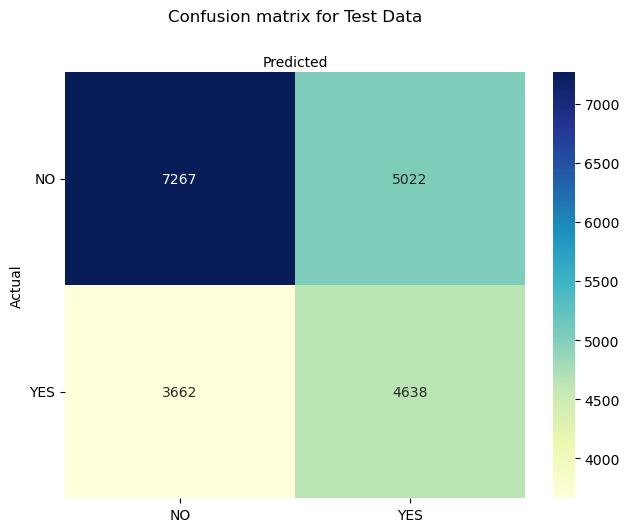

In [36]:
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = ['NO','YES']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" , fmt = 'g', ax = ax)

ax.set_xticks(tick_marks + 0.5)
ax.set_yticks(tick_marks + 0.5)
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names, rotation = 0)

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Test Data', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')


In [37]:
# Test Data accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5782213803487299


Accuracy of model on train data: 58.3%

Accuracy of model on test data: 57.8%

Yes, there is stability in the acccuracy between the test and training data.

Area under the ROC curve for threshold 0.5: 0.6177279416306287


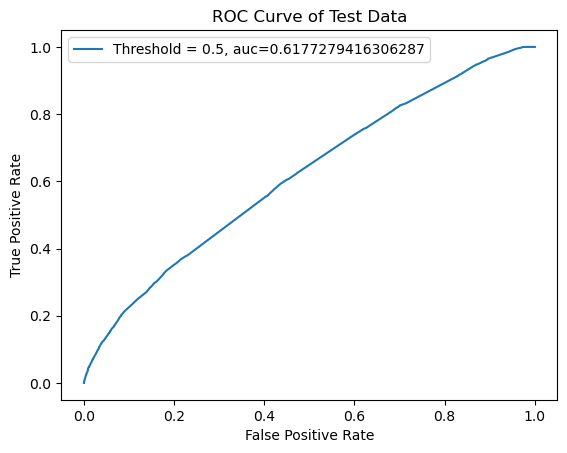

In [38]:
# ROC Curve for testing Data
y_scores = clf2.predict_proba(X_test2)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_scores)
auc = metrics.roc_auc_score(y_test, y_scores)
plt.plot(fpr, tpr, label = 'Threshold = 0.5, auc='+str(auc))
print('Area under the ROC curve for threshold 0.5:', auc )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Test Data')
plt.legend()
plt.show()

# Data Mining - Assignment 4 pt. 2

### Question 1
1. Using same train and test sample - X_train2 and X_test2. Wiull keep readmitted as binary
2. Build full classification tree using train data dn all variables

In [39]:
# Libraries
from sklearn.tree import DecisionTreeClassifier

In [40]:
# Perform GridSearchCv on DecisionTreeClassifier parameters ('max_depth', 'criterion', 'max_features', 'max_leaf_nodes' etc)
param_map = {'max_depth': [5, 7, 9],
             'criterion': ['gini', 'entropy'],
             'max_features': ['log2', 'sqrt', None],
             'max_leaf_nodes': [8, 10, 12]}

In [41]:
# Specify class_weight = 'balanced' to account for imbalance in re-admitted an non-readmitted patients
mod = DecisionTreeClassifier(class_weight = 'balanced', random_state = 42)
mod_gs = GridSearchCV(mod, param_grid = param_map, cv = 10, n_jobs = -1, verbose = 2)
mod_gs.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9],
                         'max_features': ['log2', 'sqrt', None],
                         'max_leaf_nodes': [8, 10, 12]},
             verbose=2)

In [42]:
# identify best hyper-parameters
mod_gs.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': 12}

In [43]:
# Decision Tree with best classifiers
mod_rev = DecisionTreeClassifier(class_weight = 'balanced', criterion = 'gini', max_depth = 7, max_features = None, max_leaf_nodes = 12,
                                 random_state = 42)

mod_rev.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, max_leaf_nodes=12,
                       random_state=42)

In [44]:
# Identify important features
mod_rev.feature_importances_
dt_features = dict(zip(X_train.columns, mod_rev.feature_importances_))
dt_feat_sorted = sorted(dt_features.items(), key = lambda x: x[1], reverse = True)
top_dt_feat = dt_feat_sorted[:20]

for feature, importance in top_dt_feat:
    print(f"{feature}: {importance}")

number_inpatient: 0.3776276989448836
discharge_disposition_id_11: 0.26507918577397266
number_diagnoses: 0.14831797473699665
age: 0.06597823797167744
number_outpatient: 0.06293954049610853
diabetesMed: 0.040904423044387295
number_emergency: 0.020021300164825798
admission_type_id_5: 0.019131638867147947
gender: 0.0
time_in_hospital: 0.0
num_lab_procedures: 0.0
num_procedures: 0.0
num_medications: 0.0
change: 0.0
race_Asian: 0.0
race_Caucasian: 0.0
race_Hispanic: 0.0
race_Other: 0.0
admission_type_id_3: 0.0
admission_type_id_4: 0.0


In [45]:
# Redo train data
top_dt_feat = dt_feat_sorted[:8]
top_feat_v2 = [tup[0] for tup in top_dt_feat]

dt_X_train = X_train.loc[:, X_train.columns.isin(top_feat_v2)]
dt_X_train.shape

(48040, 8)

In [46]:
# Retrain model on only best features
mod_rev.fit(dt_X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, max_leaf_nodes=12,
                       random_state=42)

In [47]:
# Train Predictions
dt_y_predict = mod_rev.predict(dt_X_train)

In [48]:
# Train Confusion Matrix
dt_train_cnf_matrix = metrics.confusion_matrix(y_train, dt_y_predict)
dt_train_cnf_matrix

array([[19047,  9543],
       [ 9585,  9865]])

In [49]:
# Train Accuracy
print("Accuracy:", metrics.accuracy_score(y_train, dt_y_predict))

Accuracy: 0.6018318068276436


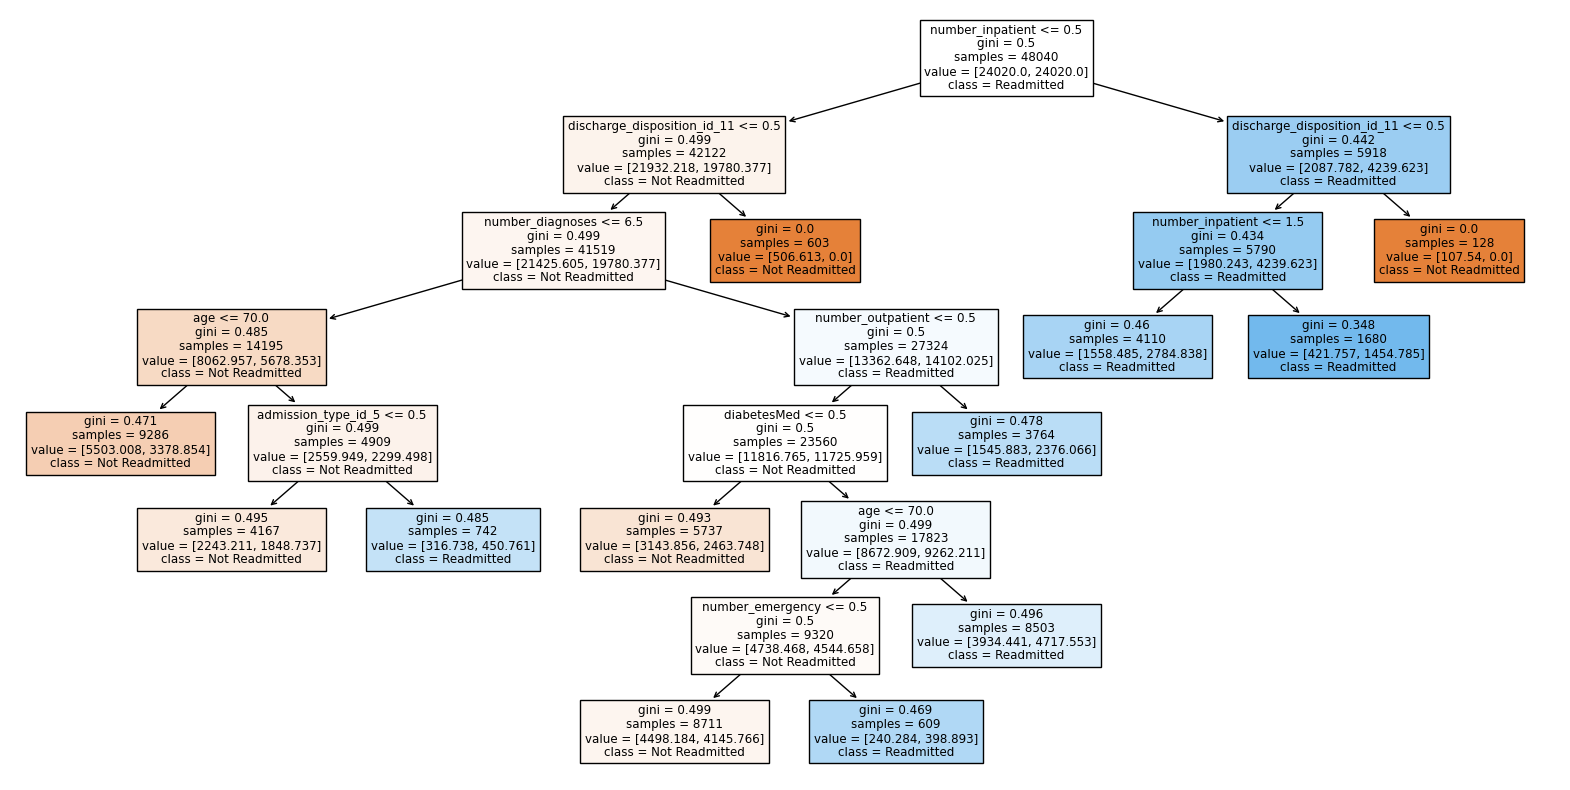

In [50]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(mod_rev, filled=True, feature_names=list(dt_X_train.columns), class_names=['Not Readmitted', 'Readmitted'])
plt.show()

Interpret the best tree.

a. How many interactions do you see? **22 interactions**

b. Can you interpret the tree? Do you like it? Comment

1. How the tree looks
With a max depth of 7 and 12 maximum nodes, it is difficult to interpret it from the visualization. However, we can see how the tree begins to make decisions. It starts by splitting number_inpatients <= 0.5. This significantly unbalances the tree with ~88% of the training data being on the left side of the tree. Next it splits by discharge_disposition_id_11. We see on the right side of the tree that it splits based on number_inpatients once more. This indicates that this field is of high importance to the model's decision making process. The left side of the tree does not repeat any fields and uses number_diagnoses, age, admission_type_id, number_outpatients, diabetesMed, and number_emergency.

2. Feature importance

Our model found 8 features important. As expected, number_inpatient field is the most important for our model. This is followed the the other fields we see in the initial splits shown by our visualization. Next is discharge_disposition_id_11, number_diagnoses, age, number_outpatient, diabetesMed, number_emergency, and finally admission_type_id_5. 

3. Confusion Matrix

Since the use case here is predicting a medical circumstance we need to judge our model by whether it has a higher recall or precision. Ideally, we have a higher recall since it is better to predict someone will be readmitted that won't be (FP) than predicting someone won't be admitted who will be (FN). From our confusion matrix we see that our recall is 0.505 and our precision is 0.506. Ideally we want a model that is optimized for recall rather than precision for the given use case.

Patient is NOT readmitted when:
- (Inpatient Number <= 0.5) AND (discharge disposition id 11 > 0.5)
- (Inpatient Number <= 0.5) AND (discharge disposition id 11 <= 0.5) AND (Number Diagnoses <= 6.5) AND (age <= 70)
- (Inpatient Number <= 0.5) AND (discharge disposition id 11 <= 0.5) AND (Number Diagnoses <= 6.5) AND (age > 70) AND (admission type id <= 0.5)
- (Inpatient Number <= 0.5) AND (discharge disposition id 11 <= 0.5) AND (Number Diagnoses > 6.5) AND (Number Outpatient <= 0.5) AND (diabetesMed <= 0.5)
- (Inpatient Number <= 0.5) AND (discharge disposition id 11 <= 0.5) AND (Number Diagnoses > 6.5) AND (Number Outpatient <= 0.5) AND (diabetesMed > 0.5) AND (age <= 70) AND (number of emergency <= 0.5)
- (Inpatient Number > 0.5) AND (discharge disposition id 11 > 0.5)

Patient is readmitted when:
- (Inpatient Number <= 0.5) AND (discharge disposition id 11 <= 0.5) AND (Number Diagnoses <= 6.5) AND (age > 70) AND (admission type id > 0.5)
- (Inpatient Number <= 0.5) AND (discharge disposition id 11 <= 0.5) AND (Number Diagnoses > 6.5) AND (Number Outpatient > 0.5)
- (Inpatient Number <= 0.5) AND (discharge disposition id 11 <= 0.5) AND (Number Diagnoses > 6.5) AND (Number Outpatient <= 0.5) AND (diabetesMed > 0.5) AND (age > 70)
- (Inpatient Number <= 0.5) AND (discharge disposition id 11 <= 0.5) AND (Number Diagnoses > 6.5) AND (Number Outpatient <= 0.5) AND (diabetesMed > 0.5) AND (age <= 70) AND (number of emergency > 0.5)
- (Inpatient Number > 0.5) AND (discharge disposition id 11 > 0.5) AND (Inpatient Number > 1.5)
- (Inpatient Number > 0.5) AND (discharge disposition id 11 > 0.5) AND (Inpatient Number <= 1.5)


### Question 4
Predict values for test data and compare confusion matrix with train. Are the results stable?

In [51]:
# revised test data
dt_X_test = X_test.loc[:, X_test.columns.isin(top_feat_v2)]
dt_X_test.shape

(20589, 8)

In [52]:
# predict using test data
dt_test_y_predict = mod_rev.predict(dt_X_test)

In [53]:
# Test Confusion Matrix
dt_cnf_matrix = metrics.confusion_matrix(y_test, dt_test_y_predict)
dt_cnf_matrix

array([[8202, 4087],
       [4107, 4193]])

Train Prediction Accuracy: 60.2%

Test Prediction Accuacy: 60.2%

Yes, the model is stable across train and test data

### Question 5
Ultimately, when deciding which model to use we need to priortize accuracy and recall. Given the medical use-case we need a model that not only has high accuracy, but has a lower recall since failing to identify a patient who will be readmitted can have serious consequences. 

Our tree model has an accuracy of 60.2% and recall of 50.5%, while our logistical regression model has an accuracy of 57.8% and recall of 55.9%. While it's important to note that the tree model has greater transparency in the decision making process, which is useful in the medical field, since we prioritize recall, we find the logistic regression model to be a better choice.

In [ ]:
# Test Logistic Regression Accuracy, Precision, Recall, and F1
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precison:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))
print("\n")

# Test Decision Tree Accuracy, Precision, Recall, and F1
print("Accuracy:", metrics.accuracy_score(y_test, dt_test_y_predict))
print("Precison:", metrics.precision_score(y_test, dt_test_y_predict))
print("Recall:", metrics.recall_score(y_test, dt_test_y_predict))
print("F1 score:", metrics.f1_score(y_test, dt_test_y_predict))